<a href="https://colab.research.google.com/github/bilal444hammas/Piaic-Quarter-3/blob/master/CH_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CH#7

**Introduction to the functional API**
                                                                                In the functional API , you directly manipulate tensors, and you use layers as functions
that take tensors and return tensors (hence, the name functional API ):

In [ ]:
from tensorflow.keras import Input, layers
input_tensor = Input(shape=(32,))
dense = layers.Dense(32, activation='relu')
output_tensor = dense(input_tensor)

Let’s start with a minimal example that shows side by side a simple Sequential model
and its equivalent in the functional API :

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras import Input
######(Sequential model, which you already know about)######
seq_model = Sequential()
seq_model.add(layers.Dense(32, activation='relu', input_shape=(64,)))
seq_model.add(layers.Dense(32, activation='relu'))
seq_model.add(layers.Dense(10, activation='softmax'))

seq_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#### Its functional API or equivalent  ###
input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)
### The Model class turns an input tensor and output tensor into a model. ###
model = Model(input_tensor, output_tensor)

model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


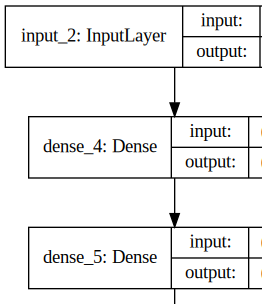

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
### Generates dummy Numpy data to train on ##
import numpy as np 
x_train = np.random.random((1000, 64))
y_train = np.random.random((1000, 10))

model.fit(x_train, y_train, epochs=10, batch_size=128)
score = model.evaluate(x_train, y_train)
print(score)

Epoch 1/10
8/8 [==============================] - 0s 2ms/step - loss: 11.8813
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 12.4218
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: 13.8708
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: 15.5743
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: 17.1785
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: 18.9981
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 21.2647
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: 23.4496
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: 26.0065
Epoch 10/10
32/32 [==============================] - 0s 812us/step - loss: 30.1570
30.156980514526367


Listing 7.1 Functional API implementation of a two-input question-answering model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import Input
text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

text_input = Input(shape=(None,), dtype='int32', name='text')
embedded_text = layers.Embedding(text_vocabulary_size,64)(text_input)
encoded_text = layers.LSTM(32)(embedded_text)

question_input = Input(shape=(None,),dtype='int32',name='question')
embedded_question = layers.Embedding( question_vocabulary_size,32)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)

concatenated = layers.concatenate([encoded_text, encoded_question],axis=-1)

answer = layers.Dense(answer_vocabulary_size,activation='softmax')(concatenated)

model = Model([text_input, question_input], answer)
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['acc'])


In [ ]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
question (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 64)     640000      text[0][0]                       
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 32)     320000      question[0][0]                   
_______________________________________________________________________________________

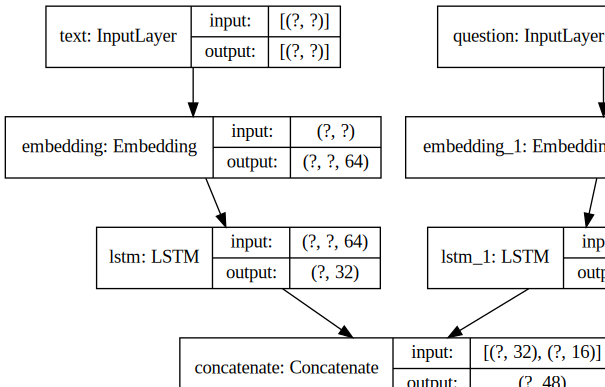

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
import numpy as np
num_samples = 1000 
max_length = 100
import keras

# Generates dummy Numpy data
text = np.random.randint(1, text_vocabulary_size,size=(num_samples, max_length))
question = np.random.randint(1, question_vocabulary_size,size=(num_samples, max_length)) 

answers = np.random.randint(answer_vocabulary_size, size=(num_samples))
answers = keras.utils.to_categorical(answers, answer_vocabulary_size)



model.fit([text, question], answers, epochs=10, batch_size=128)

#model.fit({'text': text, 'question': question}, answers,epochs=10, batch_size=128)

Epoch 1/10
8/8 [==============================] - 1s 98ms/step - loss: 6.2145 - acc: 0.0010
Epoch 2/10
8/8 [==============================] - 1s 96ms/step - loss: 6.1966 - acc: 0.0320
Epoch 3/10
8/8 [==============================] - 1s 93ms/step - loss: 6.1380 - acc: 0.0060
Epoch 4/10
8/8 [==============================] - 1s 96ms/step - loss: 6.0601 - acc: 0.0040
Epoch 5/10
8/8 [==============================] - 1s 97ms/step - loss: 5.9957 - acc: 0.0110
Epoch 6/10
8/8 [==============================] - 1s 94ms/step - loss: 5.9140 - acc: 0.0140
Epoch 7/10
8/8 [==============================] - 1s 94ms/step - loss: 5.8203 - acc: 0.0120
Epoch 8/10
8/8 [==============================] - 1s 94ms/step - loss: 5.7324 - acc: 0.0190
Epoch 9/10
8/8 [==============================] - 1s 92ms/step - loss: 5.6446 - acc: 0.0300
Epoch 10/10
8/8 [==============================] - 1s 93ms/step - loss: 5.5642 - acc: 0.0270


Listing 7.2 Feeding data to a multi-input model

In [ ]:

import numpy as np
import keras
#Generates dummy Numpy data
num_samples = 1000
max_length = 100
text = np.random.randint(1,text_vocabulary_size,size=(num_samples, max_length))
question = np.random.randint(1,question_vocabulary_size,size=(num_samples, max_length))
answers = np.random.randint(answer_vocabulary_size,size=(num_samples))
answers = keras.utils.to_categorical(answers, answer_vocabulary_size)
#model.fit([text,question],answers, epochs=10, batch_size=128)
model.fit({'text': text, 'question': question}, answers,epochs=10, batch_size=128)

Epoch 1/10
8/8 [==============================] - 1s 95ms/step - loss: 6.3121 - acc: 0.0020
Epoch 2/10
8/8 [==============================] - 1s 95ms/step - loss: 6.1645 - acc: 0.0020
Epoch 3/10
8/8 [==============================] - 1s 97ms/step - loss: 6.0754 - acc: 0.0090
Epoch 4/10
8/8 [==============================] - 1s 93ms/step - loss: 6.0036 - acc: 0.0110
Epoch 5/10
8/8 [==============================] - 1s 95ms/step - loss: 5.9171 - acc: 0.0140
Epoch 6/10
8/8 [==============================] - 1s 94ms/step - loss: 5.8249 - acc: 0.0170
Epoch 7/10
8/8 [==============================] - 1s 93ms/step - loss: 5.7309 - acc: 0.0250
Epoch 8/10
8/8 [==============================] - 1s 100ms/step - loss: 5.6618 - acc: 0.0250
Epoch 9/10
8/8 [==============================] - 1s 95ms/step - loss: 5.5681 - acc: 0.0290
Epoch 10/10
8/8 [==============================] - 1s 95ms/step - loss: 5.4960 - acc: 0.0330


Listing 7.3 Functional API implementation of a three-output model

In [ ]:
from keras import layers
from keras import Input 
from keras.models import Model 

vocabulary_size = 50000 
num_income_groups = 10 

posts_input = Input(shape=(None,), dtype='int32', name='posts')

#embedded_posts = layers.Embedding(256, vocabulary_size)(posts_input) 
embedded_posts = layers.Embedding(vocabulary_size,256)(posts_input)

x = layers.Conv1D(128, 5, activation='relu', padding='same')(embedded_posts)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu', padding='same')(x)
x = layers.Conv1D(256, 5, activation='relu', padding='same')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu', padding='same')(x)
x = layers.Conv1D(256, 5, activation='relu', padding='same')(x) 
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x) 

# Note that the output layers are given names.

age_prediction = layers.Dense(1, name='age')(x)

income_prediction = layers.Dense(num_income_groups, activation='softmax',name='income')(x)

gender_prediction = layers.Dense(1, activation='sigmoid', name='gender')(x)

model = Model(posts_input,[age_prediction, income_prediction, gender_prediction])

print("Model is ready!")

Model is ready!


In [ ]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
posts (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 256)    12800000    posts[0][0]                      
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, None, 128)    163968      embedding_2[0][0]                
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, None, 128)    0           conv1d[0][0]                     
_______________________________________________________________________________________

### ***Listing 7.4 Compilation options of a multi-output model: multiple losses***

In [ ]:
###Compilation options of a multi-output model: multiple losses###
model.compile(optimizer='rmsprop',loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'])
##Equivalent (possible only if you give names to the output layers) ##
#model.compile(optimizer='rmsprop',loss={'age': 'mse','income': 'categorical_crossentropy','gender': 'binary_crossentropy'})

In [ ]:
import numpy as np 
import keras


num_samples = 1000 
max_length = 100 

posts = np.random.randint(1, vocabulary_size, size=(num_samples, max_length))


age_targets = np.random.randint(0, 100, size=(num_samples,1))

income_targets = np.random.randint(1, num_income_groups, size=(num_samples,1))
income_targets = keras.utils.to_categorical(income_targets,num_income_groups)

gender_targets = np.random.randint(0, 2, size=(num_samples,1))


# age_targets, income_targets, and gender_targets are assumed to be Numpy arrays.

model.fit(posts, [age_targets, income_targets, gender_targets], epochs=10, batch_size=64)

# Equivalent (possible only if you give names to the output layers)

#model.fit(posts, {'age': age_targets,'income': income_targets,'gender': gender_targets},epochs=10, batch_size=64)

Epoch 1/10
16/16 [==============================] - 7s 437ms/step - loss: 1634.6246 - age_loss: 1628.7164 - income_loss: 3.5986 - gender_loss: 2.3097
Epoch 2/10
16/16 [==============================] - 7s 438ms/step - loss: 829.2762 - age_loss: 826.1501 - income_loss: 2.3640 - gender_loss: 0.7620
Epoch 3/10
16/16 [==============================] - 7s 440ms/step - loss: 803.1984 - age_loss: 800.2040 - income_loss: 2.2862 - gender_loss: 0.7081
Epoch 4/10
16/16 [==============================] - 7s 435ms/step - loss: 342.1697 - age_loss: 339.1999 - income_loss: 2.2574 - gender_loss: 0.7124
Epoch 5/10
16/16 [==============================] - 7s 437ms/step - loss: 387.3622 - age_loss: 384.4022 - income_loss: 2.2606 - gender_loss: 0.6994
Epoch 6/10
16/16 [==============================] - 7s 429ms/step - loss: 512.1121 - age_loss: 509.1537 - income_loss: 2.2381 - gender_loss: 0.7202
Epoch 7/10
16/16 [==============================] - 7s 433ms/step - loss: 287.6184 - age_loss: 284.6369 - inco

Listing 7.5 Compilation options of a multi-output model: loss weighting

In [ ]:
#### Compilation options of a multi-output model: loss weighting####
model.compile(optimizer='rmsprop',
loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'],loss_weights=[0.25, 1., 10.])

##Equivalent (possible only if you give names to the output layers) ##
#model.compile(optimizer='rmsprop',loss={'age': 'mse','income': 'categorical_crossentropy','gender': 'binary_crossentropy'},
#loss_weights={'age': 0.25,'income': 1.,'gender': 10.})

In [ ]:
import numpy as np 
import keras


num_samples = 1000 
max_length = 100 

posts = np.random.randint(1, vocabulary_size, size=(num_samples, max_length))


age_targets = np.random.randint(0, 100, size=(num_samples,1))

income_targets = np.random.randint(1, num_income_groups, size=(num_samples,1))
income_targets = keras.utils.to_categorical(income_targets,num_income_groups)

gender_targets = np.random.randint(0, 2, size=(num_samples,1))


# age_targets, income_targets, and gender_targets are assumed to be Numpy arrays.

model.fit(posts, [age_targets, income_targets, gender_targets], epochs=10, batch_size=64)

# Equivalent (possible only if you give names to the output layers)

#model.fit(posts, {'age': age_targets,'income': income_targets,'gender': gender_targets},epochs=10, batch_size=64)

Epoch 1/10
16/16 [==============================] - 7s 440ms/step - loss: 451.7021 - age_loss: 1768.5016 - income_loss: 2.3710 - gender_loss: 0.7206
Epoch 2/10
16/16 [==============================] - 7s 437ms/step - loss: 118.0697 - age_loss: 429.9289 - income_loss: 2.2774 - gender_loss: 0.8310
Epoch 3/10
16/16 [==============================] - 7s 439ms/step - loss: 80.3882 - age_loss: 274.2931 - income_loss: 2.3295 - gender_loss: 0.9485
Epoch 4/10
16/16 [==============================] - 7s 439ms/step - loss: 81.1257 - age_loss: 280.7173 - income_loss: 2.3010 - gender_loss: 0.8645
Epoch 5/10
16/16 [==============================] - 7s 440ms/step - loss: 89.1738 - age_loss: 304.0735 - income_loss: 2.3641 - gender_loss: 1.0791
Epoch 6/10
16/16 [==============================] - 7s 439ms/step - loss: 65.6730 - age_loss: 216.1313 - income_loss: 2.3205 - gender_loss: 0.9320
Epoch 7/10
16/16 [==============================] - 7s 434ms/step - loss: 68.0640 - age_loss: 229.2402 - income_los

Listing 7.6 Feeding data to a multi-output model

In [ ]:
#### Feeding data to a multi-output model ###
model.fit(posts, [age_targets, income_targets, gender_targets],
epochs=10, batch_size=64)
##Equivalent (possible only if you give names to the output layers) ##
#model.fit(posts_input, {'age': age_targets,'income': income_targets,'gender': gender_targets},epochs=10, batch_size=64)

Epoch 1/10
16/16 [==============================] - 7s 436ms/step - loss: 71.6516 - age_loss: 243.0056 - income_loss: 2.2762 - gender_loss: 0.8624
Epoch 2/10
16/16 [==============================] - 7s 434ms/step - loss: 43.5968 - age_loss: 128.3760 - income_loss: 2.2975 - gender_loss: 0.9205
Epoch 3/10
16/16 [==============================] - 7s 436ms/step - loss: 63.4154 - age_loss: 207.0587 - income_loss: 2.3022 - gender_loss: 0.9348
Epoch 4/10
16/16 [==============================] - 7s 437ms/step - loss: 51.8989 - age_loss: 161.8346 - income_loss: 2.3089 - gender_loss: 0.9131
Epoch 5/10
16/16 [==============================] - 7s 440ms/step - loss: 57.1714 - age_loss: 187.0663 - income_loss: 2.2714 - gender_loss: 0.8133
Epoch 6/10
16/16 [==============================] - 7s 435ms/step - loss: 56.9107 - age_loss: 185.6816 - income_loss: 2.2903 - gender_loss: 0.8200
Epoch 7/10
16/16 [==============================] - 7s 433ms/step - loss: 49.2582 - age_loss: 154.8842 - income_loss: 

In [ ]:
import numpy as np 
import keras


num_samples = 1000 
max_length = 100 

posts = np.random.randint(1, vocabulary_size, size=(num_samples, max_length))


age_targets = np.random.randint(0, 100, size=(num_samples,1))


income_targets = np.random.randint(1, num_income_groups, size=(num_samples,1))
income_targets = keras.utils.to_categorical(income_targets,num_income_groups)


gender_targets = np.random.randint(0, 2, size=(num_samples,1))


# age_targets, income_targets, and gender_targets are assumed to be Numpy arrays.

model.fit(posts, [age_targets, income_targets, gender_targets], epochs=10, batch_size=64)

# Equivalent (possible only if you give names to the output layers)

#model.fit(posts, {'age': age_targets,'income': income_targets,'gender': gender_targets},epochs=10, batch_size=64)

Epoch 1/10
16/16 [==============================] - 7s 435ms/step - loss: 214.0938 - age_loss: 815.8174 - income_loss: 2.2641 - gender_loss: 0.7875
Epoch 2/10
16/16 [==============================] - 7s 434ms/step - loss: 121.9849 - age_loss: 448.2116 - income_loss: 2.2556 - gender_loss: 0.7676
Epoch 3/10
16/16 [==============================] - 7s 425ms/step - loss: 58.6829 - age_loss: 191.9621 - income_loss: 2.2953 - gender_loss: 0.8397
Epoch 4/10
16/16 [==============================] - 7s 427ms/step - loss: 53.1492 - age_loss: 170.8663 - income_loss: 2.2616 - gender_loss: 0.8171
Epoch 5/10
16/16 [==============================] - 7s 431ms/step - loss: 49.0704 - age_loss: 154.3206 - income_loss: 2.2756 - gender_loss: 0.8215
Epoch 6/10
16/16 [==============================] - 7s 431ms/step - loss: 50.8198 - age_loss: 162.2258 - income_loss: 2.2888 - gender_loss: 0.7975
Epoch 7/10
16/16 [==============================] - 7s 435ms/step - loss: 44.7658 - age_loss: 140.8799 - income_loss

INCEPTION MODULES
# New Section

In [ ]:
from keras import layers
from keras.layers import Input

# This example assumes the existence of a 4D input tensor x:
# This returns a typical image tensor like those of MNIST dataset

x = Input(shape=(28, 28, 1), dtype='float32', name='images')
print("x.shape:",x.shape)

branch_a = layers.Conv2D(128, 1,activation='relu', strides=2)(x)
branch_b = layers.Conv2D(128, 1, activation='relu')(x)
branch_b = layers.Conv2D(128, 3, activation='relu', strides=2)(branch_b)
branch_c = layers.AveragePooling2D(3, strides=2)(x)
branch_c = layers.Conv2D(128, 3, activation='relu')(branch_c)
branch_d = layers.Conv2D(128, 1, activation='relu')(x)
branch_d = layers.Conv2D(128, 3, activation='relu')(branch_d)
branch_d = layers.Conv2D(128, 3, activation='relu', strides=2)(branch_d)
output = layers.concatenate([branch_a, branch_b, branch_c, branch_d], axis=-1)

NameError: ignored

In [ ]:
import keras
from keras import layers 
from keras.layers import Input


x = Input(shape=(28, 28, 1), dtype='float32', name='images')
print("x.shape:",x.shape)


branch_a = layers.Conv2D(128, 1, padding='same', activation='relu', strides=2)(x)

branch_b = layers.Conv2D(128, 1, padding='same', activation='relu')(x)
branch_b = layers.Conv2D(128, 3, padding='same', activation='relu', strides=2)(branch_b)

branch_c = layers.AveragePooling2D(3,  padding='same', strides=2)(x)
branch_c = layers.Conv2D(128, 3, padding='same', activation='relu')(branch_c)

branch_d = layers.Conv2D(128, 1, padding='same', activation='relu')(x) 
branch_d = layers.Conv2D(128, 3, padding='same', activation='relu')(branch_d)
branch_d = layers.Conv2D(128, 3, padding='same', activation='relu', strides=2)(branch_d)

output = layers.concatenate([branch_a, branch_b, branch_c, branch_d], axis=-1)

output = layers.Flatten()(output)
output = layers.Dense(512, activation='relu')(output)
predictions = layers.Dense(10, activation='softmax')(output)

model = keras.models.Model(inputs=x, outputs=predictions)

x.shape: (None, 28, 28, 1)
